# Import Libraries

In [32]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

The **CO2 EMISSIONS (g/km)** column is the dependent column, and the rest are the independent columns.

In [96]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [97]:
print(f'The shape of the data frame : {df.shape}')

The shape of the data frame : (1067, 13)


In [98]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [99]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [100]:
df.duplicated().sum()

0

In [101]:
df = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
]

df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


# Exercise 1 : Histogram

Plot a Histogram for the following columns :-

1. CO2EMISSIONS
2. CYLINDERS
3. ENGINESIZE
4. FUELCONSUMPTION_COMB
5. FUELCONSUMPTION_CITY
6. FUELCONSUMPTION_HWY
7. FUELCONSUMPTION_COMB_MPG

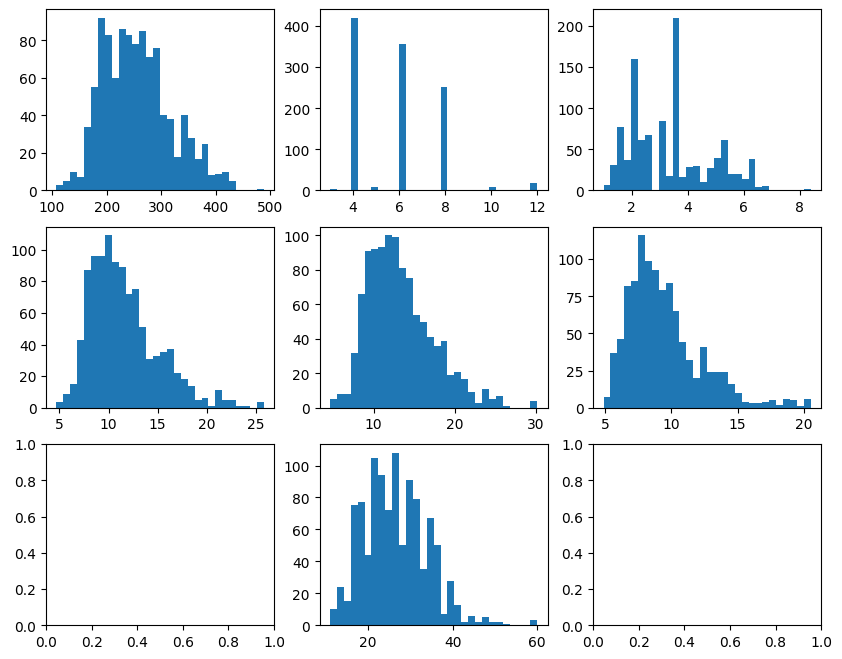

In [102]:

fig, axs = plt.subplots(3, 3, figsize=(10, 8))

axs[0, 0].hist(df['CO2EMISSIONS'], bins=30)

axs[0, 1].hist(df['CYLINDERS'], bins=30)

axs[0, 2].hist(df['ENGINESIZE'], bins=30)

axs[1, 0].hist(df['FUELCONSUMPTION_COMB'], bins=30)

axs[1, 1].hist(df['FUELCONSUMPTION_CITY'], bins=30)

axs[1, 2].hist(df['FUELCONSUMPTION_HWY'], bins=30)

axs[2, 1].hist(df['FUELCONSUMPTION_COMB_MPG'], bins=30)

plt.show()

# Exercise 2 : Scatter Plots

Plot 7 scatter plots, the 7 X features with CO2EMISSIONS.

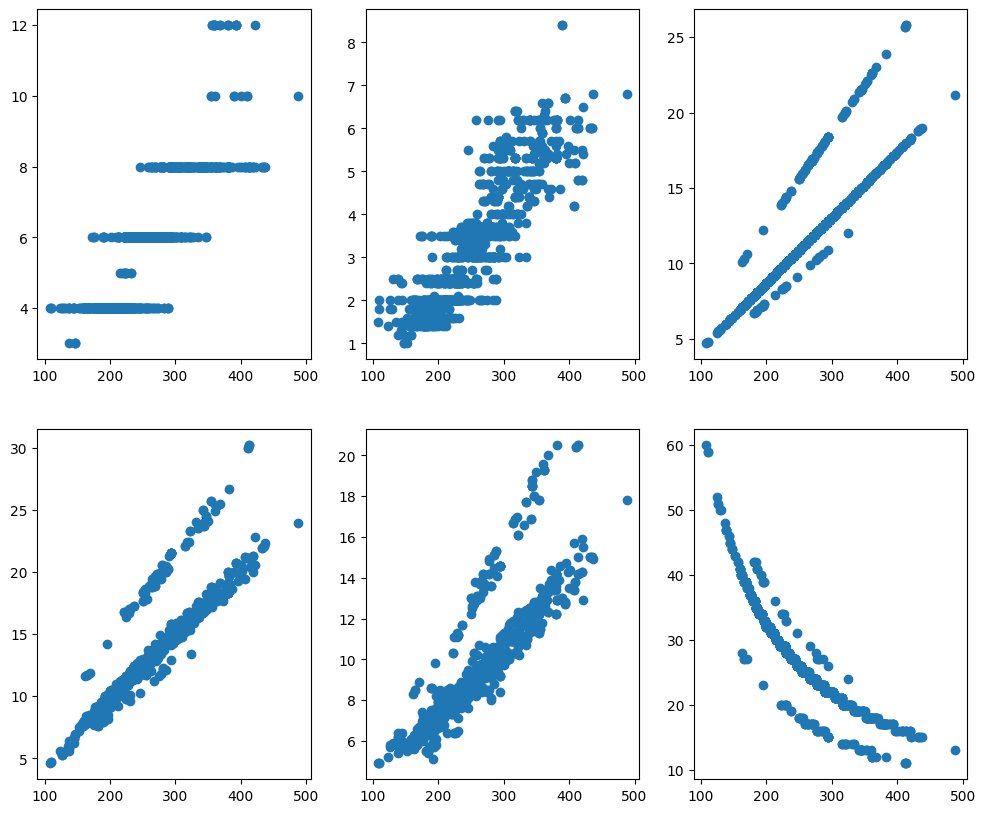

In [103]:

fig, axs = plt.subplots(2, 3, figsize=(12, 10))

axs[0, 0].scatter(df['CO2EMISSIONS'], df['CYLINDERS'])

axs[0, 1].scatter(df['CO2EMISSIONS'], df['ENGINESIZE'])

axs[0, 2].scatter(df['CO2EMISSIONS'], df['FUELCONSUMPTION_COMB'])

axs[1, 0].scatter(df['CO2EMISSIONS'], df['FUELCONSUMPTION_CITY'])

axs[1, 1].scatter(df['CO2EMISSIONS'], df['FUELCONSUMPTION_HWY'])

axs[1, 2].scatter(df['CO2EMISSIONS'], df['FUELCONSUMPTION_COMB_MPG'])

plt.show()

# Exercise 3 : Box Plots

Plot 6 box plots for :-
1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY
6. FUELCONSUMPTION_COMB_MPG

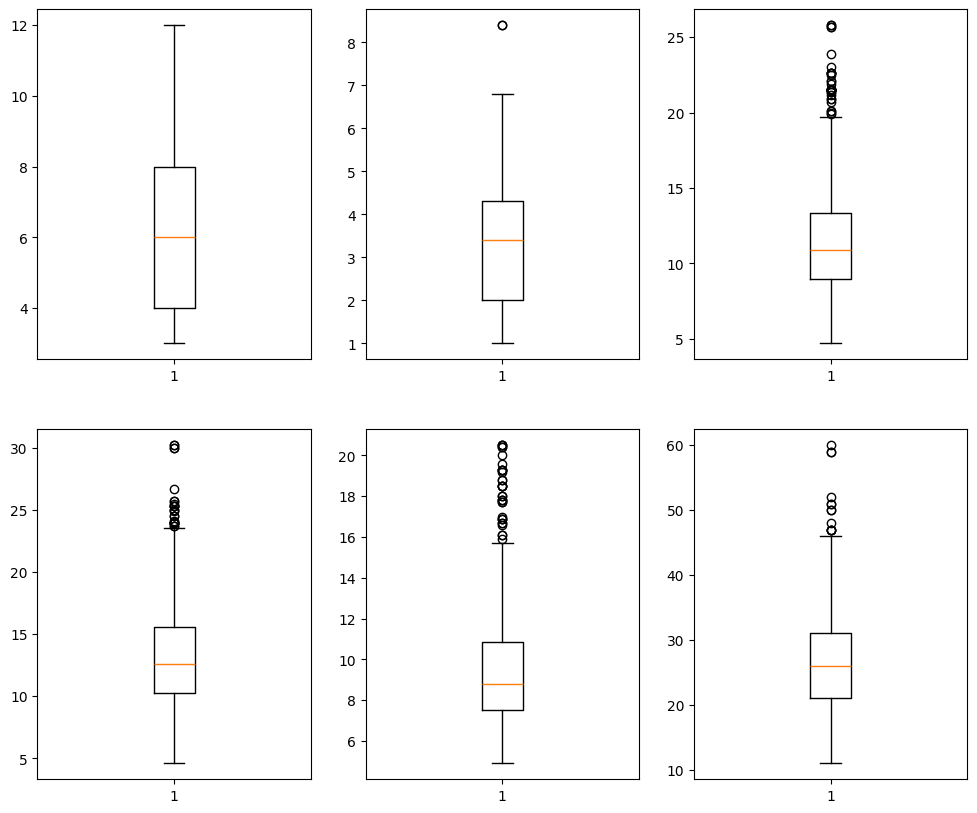

In [104]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

axs[0, 0].boxplot(df['CYLINDERS'])

axs[0, 1].boxplot(df['ENGINESIZE'])

axs[0, 2].boxplot(df['FUELCONSUMPTION_COMB'])

axs[1, 0].boxplot(df['FUELCONSUMPTION_CITY'])

axs[1, 1].boxplot(df['FUELCONSUMPTION_HWY'])

axs[1, 2].boxplot(df['FUELCONSUMPTION_COMB_MPG'])

plt.show()

# Exercise 4 : Remove Outliers

Then plot a box plot to check if the outliers was removed or not.

In [105]:
Q1 = df['CYLINDERS'].quantile(0.25)
Q3 = df['CYLINDERS'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['CYLINDERS'] < Q1 - 1.5 * IQR) | (df['CYLINDERS'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

Q1 = df['ENGINESIZE'].quantile(0.25)
Q3 = df['ENGINESIZE'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['ENGINESIZE'] < Q1 - 1.5 * IQR) | (df['ENGINESIZE'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

Q1 = df['FUELCONSUMPTION_COMB'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_COMB'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['FUELCONSUMPTION_COMB'] < Q1 - 1.5 * IQR) | (df['FUELCONSUMPTION_COMB'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

Q1 = df['FUELCONSUMPTION_CITY'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_CITY'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['FUELCONSUMPTION_CITY'] < Q1 - 1.5 * IQR) | (df['FUELCONSUMPTION_CITY'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

Q1 = df['FUELCONSUMPTION_HWY'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_HWY'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['FUELCONSUMPTION_HWY'] < Q1 - 1.5 * IQR) | (df['FUELCONSUMPTION_HWY'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index)

Q1 = df['FUELCONSUMPTION_COMB_MPG'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_COMB_MPG'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

outliers = df[(df['FUELCONSUMPTION_COMB_MPG'] < Q1 - 1.5 * IQR) | (df['FUELCONSUMPTION_COMB_MPG'] > Q3 + 1.5 * IQR)]
df = df.drop(outliers.index) 

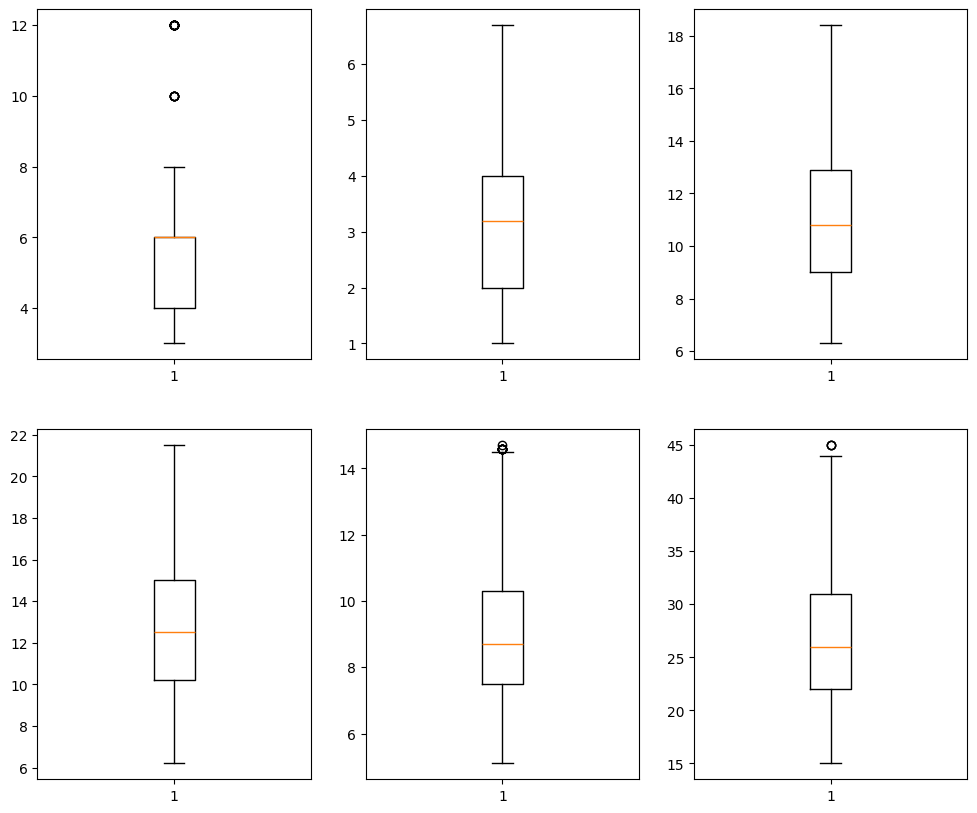

In [106]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

axs[0, 0].boxplot(df['CYLINDERS'])

axs[0, 1].boxplot(df['ENGINESIZE'])

axs[0, 2].boxplot(df['FUELCONSUMPTION_COMB'])

axs[1, 0].boxplot(df['FUELCONSUMPTION_CITY'])

axs[1, 1].boxplot(df['FUELCONSUMPTION_HWY'])

axs[1, 2].boxplot(df['FUELCONSUMPTION_COMB_MPG'])

plt.show()

# Exercise 5 : Train and Test Split

Split the features in X variable and target in the Y variable.

Then use train_test_split method to split the dataset into train and test sets.

The test set have 20% of the dataset and the random state is 42.

In [29]:
x = df.loc[:,df.columns != 'CO2EMISSIONS']
y = df.loc[:,df.columns  == 'CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state=42, test_size=0.2) 


(800, 6)

# Exercise 4 : Simple Linear Regression.

Train a simple linear regression

X = Engine Size.
Y = Emission.

What is the coefficients and y intercept?

In [89]:
linear_regression_model = LinearRegression()
linear_regression_model.fit((X_test['ENGINESIZE'].to_numpy()).reshape(-1,1), y_test['CO2EMISSIONS'])
wight = linear_regression_model.coef_
bias = linear_regression_model.intercept_
print(wight, bias)

[39.97995182] 124.69057758355001


# Exercise 5 : Plot the Output

Plot linear regression model (output).

In [90]:
def find_y(x, beta, b):
    y = []
    for xi in x:
        y.append(xi * beta + b)
    return np.array(y)

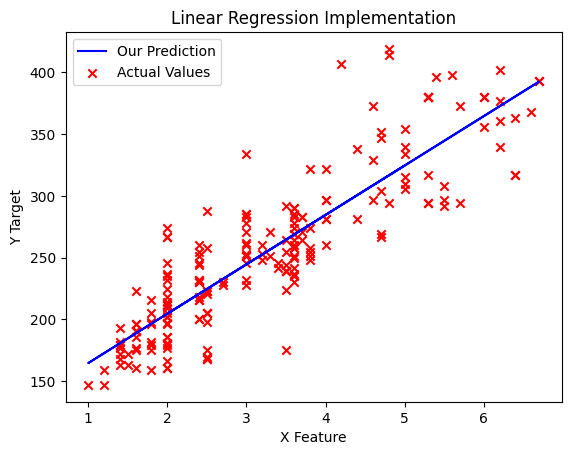

In [91]:
y_pred = find_y(X_test['ENGINESIZE'], wight[0], bias)
plt.plot(X_test['ENGINESIZE'], y_pred, c='b',label='Our Prediction')
plt.scatter(X_test['ENGINESIZE'], y_test['CO2EMISSIONS'], marker='x', c='r',label='Actual Values')
plt.title("Linear Regression Implementation")

plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()

plt.show();

# Exercise 6 : Evaluation

Evaluate the model using MSE, RMSE, MAE, and R^2.

In [58]:
print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')

MSE  : 987.6380467812269
RMSE : 31.426709130630062
MAE  : 23.255455351472975
R^2  : 0.7608594923114447


# Exercise 7 : Repeat 4, 5, and 6

Repeat the steps 4, 5, and 6.

For the rest features (CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) and then sort the models based on the best performance.

Note : Do not train the FUELCONSUMPTION_COMB_MPG.

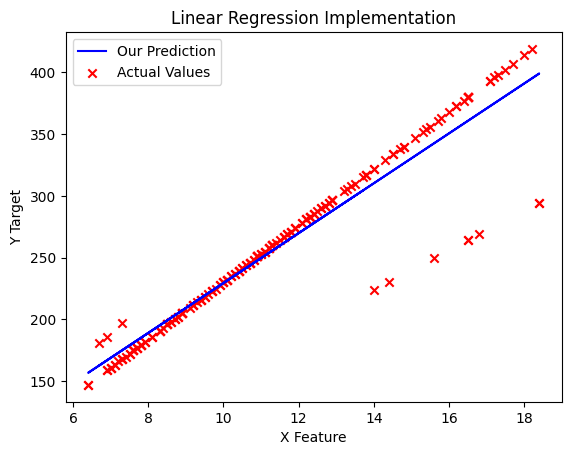

MSE  : 450.5180018750488
RMSE : 21.225409345288227
MAE  : 10.613080747331589
R^2  : 0.890914385039788


In [59]:
FCC = LinearRegression()
FCC.fit((X_test['FUELCONSUMPTION_COMB'].to_numpy()).reshape(-1,1), y_test['CO2EMISSIONS'])
wightFCC = FCC.coef_
biasFCC = FCC.intercept_

y_pred = find_y(X_test['FUELCONSUMPTION_COMB'], wightFCC, biasFCC)
plt.plot(X_test['FUELCONSUMPTION_COMB'], y_pred, c='b',label='Our Prediction')
plt.scatter(X_test['FUELCONSUMPTION_COMB'], y_test['CO2EMISSIONS'], marker='x', c='r',label='Actual Values')
plt.title("Linear Regression Implementation")
plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()
plt.show();

print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')

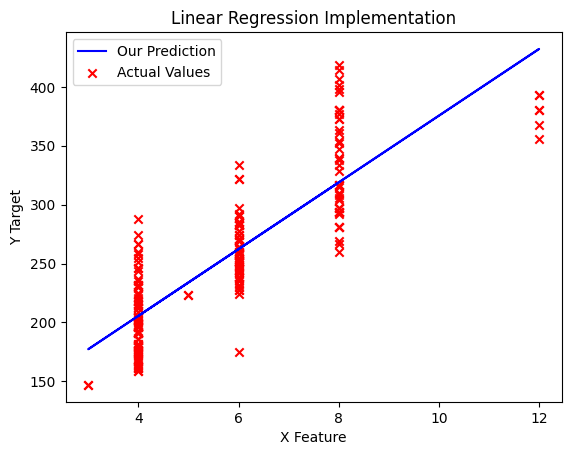

MSE  : 1175.1068527319144
RMSE : 34.2798315738557
MAE  : 27.10544020204215
R^2  : 0.7154669666013196


In [60]:
CY = LinearRegression()
CY.fit((X_test['CYLINDERS'].to_numpy()).reshape(-1,1), y_test['CO2EMISSIONS'])
wightCY = CY.coef_
biasCY = CY.intercept_

y_pred = find_y(X_test['CYLINDERS'], wightCY, biasCY)
plt.plot(X_test['CYLINDERS'], y_pred, c='b',label='Our Prediction')
plt.scatter(X_test['CYLINDERS'], y_test['CO2EMISSIONS'], marker='x', c='r',label='Actual Values')
plt.title("Linear Regression Implementation")
plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()
plt.show();

print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')

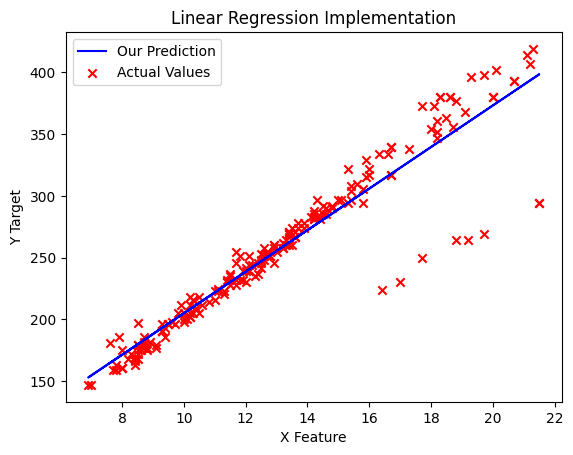

MSE  : 483.0422453094653
RMSE : 21.978222068890496
MAE  : 11.582760239164017
R^2  : 0.8830391678866609


In [61]:
FCCi = LinearRegression()
FCCi.fit((X_test['FUELCONSUMPTION_CITY'].to_numpy()).reshape(-1,1), y_test['CO2EMISSIONS'])
wightFCCi = FCCi.coef_
biasFCCi = FCCi.intercept_

y_pred = find_y(X_test['FUELCONSUMPTION_CITY'], wightFCCi, biasFCCi)
plt.plot(X_test['FUELCONSUMPTION_CITY'], y_pred, c='b',label='Our Prediction')
plt.scatter(X_test['FUELCONSUMPTION_CITY'], y_test['CO2EMISSIONS'], marker='x', c='r',label='Actual Values')
plt.title("Linear Regression Implementation")
plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()
plt.show();

print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')

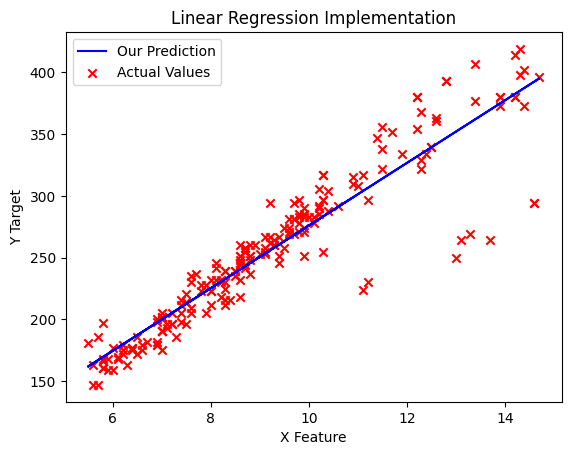

MSE  : 579.3311054172461
RMSE : 24.069297983473597
MAE  : 14.837697653607322
R^2  : 0.8597243847371336


In [62]:
FCH = LinearRegression()
FCH.fit((X_test['FUELCONSUMPTION_HWY'].to_numpy()).reshape(-1,1), y_test['CO2EMISSIONS'])
wightFCH = FCH.coef_
biasFCH = FCH.intercept_

y_pred = find_y(X_test['FUELCONSUMPTION_HWY'], wightFCH, biasFCH)
plt.plot(X_test['FUELCONSUMPTION_HWY'], y_pred, c='b',label='Our Prediction')
plt.scatter(X_test['FUELCONSUMPTION_HWY'], y_test['CO2EMISSIONS'], marker='x', c='r',label='Actual Values')
plt.title("Linear Regression Implementation")
plt.ylabel('Y Target')
plt.xlabel('X Feature')
plt.legend()
plt.show();

print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')

# Exercise 8 : Multiple Linear Regression

Train one linear regression model with the following features :-

1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY

Plot the output for each feature with the Y label.

In [94]:
lr = LinearRegression()
lr.fit(X_train[['FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']], y_train)
w = lr.coef_
b = lr.intercept_
print(w, b)
y_pred = lr.predict(X_test[['FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']])
print(f'MSE  : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {math.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE  : {mean_absolute_error(y_test, y_pred)}')
print(f'R^2  : {r2_score(y_test, y_pred)}')

[[ -5.50197161 -13.6848387   32.25281721   7.04499388   7.7468524 ]] [50.3987685]
MSE  : 398.8786866171371
RMSE : 19.971947491848088
MAE  : 13.563836069646449
R^2  : 0.9034180062881925
